In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data=sns.load_dataset("iris")

In [8]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

sepal_length       Axes(0.125,0.11;0.168478x0.77)
sepal_width     Axes(0.327174,0.11;0.168478x0.77)
petal_length    Axes(0.529348,0.11;0.168478x0.77)
petal_width     Axes(0.731522,0.11;0.168478x0.77)
dtype: object

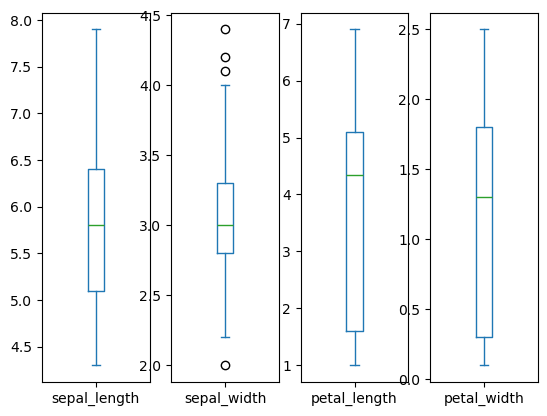

In [10]:
data[['sepal_length','sepal_width','petal_length','petal_width']].plot(kind='box', subplots=True)

In [11]:
data['species'].value_counts(normalize=True)

species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x,xt,y,yt=train_test_split(data.drop(columns="species"),
                           data.species,
                          random_state=42,
                          test_size=0.1,
                          stratify=data.species)

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf=RandomForestClassifier()

In [16]:
rf.fit(x,y)

RandomForestClassifier()

In [17]:
rf.score(xt, yt)

0.8666666666666667

In [18]:
rf.score(x, y)

1.0

By Prediction

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
yt_hat=rf.predict(xt)

In [21]:
accuracy_score(y_true=yt, y_pred=yt_hat, normalize=True)

0.8666666666666667

In [22]:
rf.feature_importances_

array([0.11715337, 0.02631593, 0.45915981, 0.39737088])

<Axes: >

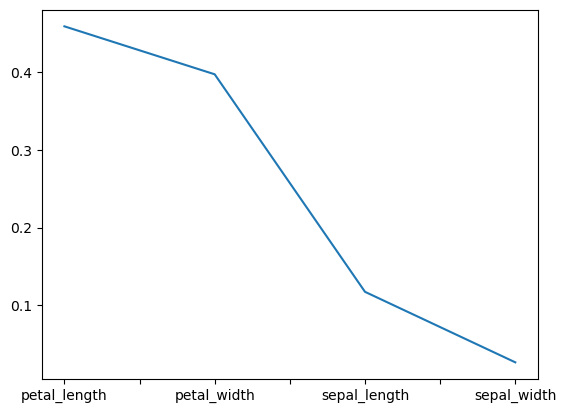

In [23]:
pd.Series(rf.feature_importances_, index=x.columns).nlargest(10).plot()

In [24]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LogisticRegression  # BINARY CLASSIFIER

dt = DecisionTreeClassifier()
nb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
#lr = LogisticRegression(max_iter=1000)


In [ ]:
model = [("Decision Tree", dt), 
         ("Naive_bayes", nb), 
         ("K_Neighbors", knn), 
         ("Support_Vector", svc)]

vc = VotingClassifier(model)


In [26]:
vc.fit(x, y)

VotingClassifier(estimators=[('Decision Tree', DecisionTreeClassifier()),
                             ('Naive_bayes', GaussianNB()),
                             ('K_Neighbors', KNeighborsClassifier()),
                             ('Support_Vector', SVC())])

In [27]:
vc.score(xt, yt)

0.9333333333333333

In [28]:
vc.estimators_

[DecisionTreeClassifier(), GaussianNB(), KNeighborsClassifier(), SVC()]

In [38]:

svc = SVC(probability=True)
model = [("Decision Tree", dt), 
         ("Naive_bayes", nb), 
         ("K_Neighbors", knn), 
         ("Support_Vector", svc)]

vc_soft = VotingClassifier(model, voting='soft')
vc_soft.fit(x, y)
vc_soft.score(xt,yt)


0.9333333333333333

# Boosting